<a href="https://colab.research.google.com/github/juniormusasizi61/Machine-Learning-100plus/blob/main/Post_harest_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###Dependencies
#import libraries required for Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [ ]:
#loading the dataset from google drive and storing it in the variable df
try:
  df = pd.read_csv('/content/drive/MyDrive/post_harvest.csv')
except FileNotFoundError:#incase the file is not found in the destination
  print('file not found in the specified directory ')
  df = None #or handle the error appropriately

In [ ]:
#viewing the first few rows of the dataset
print(df.head())

   Unnamed: 0  m49_code  cpc_code     commodity  year  loss_percentage  \
0           0       104  23161.02  Rice, milled  2015             1.78   
1           1       104  23161.02  Rice, milled  2015            11.77   
2           2       104  23161.02  Rice, milled  2015             5.88   
3           3       104  23161.02  Rice, milled  2015             3.57   
4           4       104  23161.02  Rice, milled  2015            17.65   

  loss_percentage_original loss_quantity activity food_supply_stage  \
0                    1.78%      26.12kgs  Storage           Storage   
1                   11.77%      88.18kgs  Storage           Storage   
2                    5.88%      44.09kgs  Storage           Storage   
3                    3.57%      52.24kgs  Storage           Storage   
4                   17.65%     132.27kgs  Storage           Storage   

                        treatment cause_of_loss sample_size  \
0  30 days storage, with trapping       Rodents         NaN   
1 

In [ ]:
#viewing the last rows of the dataset
print(df.tail())

       Unnamed: 0  m49_code  cpc_code commodity  year  loss_percentage  \
10391       25411       894     118.0    Millet  2000          2.50000   
10392       25412       894     118.0    Millet  2000          2.50000   
10393       25413       894     118.0    Millet  2000          2.38075   
10394       25414       894     118.0    Millet  2000          3.44008   
10395       25415       894     118.0    Millet  2000          1.27433   

      loss_percentage_original loss_quantity            activity  \
10391                      2.5           NaN      Transportation   
10392                      2.5           NaN           Winnowing   
10393                  2.38075           NaN             Storage   
10394                  3.44008           NaN  Drying, Harvesting   
10395                  1.27433           NaN             Storage   

      food_supply_stage treatment cause_of_loss sample_size  \
10391              Farm       NaN           NaN         NaN   
10392              F

In [ ]:
#smapling some specific number of rows in the dataset
print(df.sample(10))#gives an output of 10 rows of the dataset

      Unnamed: 0  m49_code  cpc_code commodity  year  loss_percentage  \
9499       22112       834     111.0     Wheat  2011          4.60995   
2000        4078       232     118.0    Millet  2015          3.50000   
1300        2341       204     113.0      Rice  2016          1.00000   
9467       22045       834     113.0      Rice  2013          3.13714   
7137       16005       624     118.0    Millet  2005          3.50000   
2954        6104       288    1234.0  Tomatoes  2010         22.50000   
4433       10526       430     113.0      Rice  2006          3.13714   
8436       19427        72     118.0    Millet  2006          3.48737   
4427       10520       430     113.0      Rice  2007          4.40333   
1759        3554       231     118.0    Millet  2009          1.00000   

     loss_percentage_original loss_quantity             activity  \
9499                  4.60995           NaN              Storage   
2000                      3.5           NaN   Drying, Harves

In [ ]:
#analysing the data types of each column of our dataset
print(df.dtypes)

Unnamed: 0                    int64
m49_code                      int64
cpc_code                    float64
commodity                    object
year                          int64
loss_percentage             float64
loss_percentage_original     object
loss_quantity                object
activity                     object
food_supply_stage            object
treatment                    object
cause_of_loss                object
sample_size                  object
method_data_collection       object
reference                    object
url                          object
notes                        object
dtype: object


In [ ]:
#analysing the dataset to know the number of columns and the number of rows in the dataset
print(df.shape)#the output shall be a set of the number of rows and the number of columns in our dataset

(10396, 17)


In [ ]:
#lets give the description of our data in the dataset
print(df.describe())#this shall return any mean, std, min, max,  percentiles as the general overview of our data in the dataset

        Unnamed: 0      m49_code      cpc_code          year  loss_percentage
count  10396.00000  10396.000000  10396.000000  10396.000000     10396.000000
mean   11843.07349    447.253944    208.316072   2010.659869         2.989790
std     7231.77974    259.620858   1012.976838      6.112047         3.803872
min        0.00000     11.000000    111.000000   2000.000000         0.004021
25%     5274.75000    231.000000    113.000000   2006.000000         1.250000
50%    11891.50000    454.000000    113.000000   2011.000000         2.500000
75%    17439.75000    686.000000    118.000000   2016.000000         3.500000
max    25415.00000    894.000000  23161.020000   2022.000000        61.100000


In [ ]:
##droppoing the unneccessary columns
d_frame = df.drop(df.columns[[0,1,2,7,8,10,11, 12, 14,15,  16]], axis = 1)
d_frame##returns the more cleaned dataset where the columns with missing values are eliminated

,commodity,year,loss_percentage,loss_percentage_original,food_supply_stage,method_data_collection
0,"Rice, milled",2015,1.78000,1.78%,Storage,Controlled Experiment
1,"Rice, milled",2015,11.77000,11.77%,Storage,Controlled Experiment
2,"Rice, milled",2015,5.88000,5.88%,Storage,Controlled Experiment
3,"Rice, milled",2015,3.57000,3.57%,Storage,Controlled Experiment
4,"Rice, milled",2015,17.65000,17.65%,Storage,Controlled Experiment
...,...,...,...,...,...,...
10391,Millet,2000,2.50000,2.5,Farm,Modelled Estimates
10392,Millet,2000,2.50000,2.5,Farm,Modelled Estimates
10393,Millet,2000,2.38075,2.38075,Storage,Modelled Estimates
10394,Millet,2000,3.44008,3.44008,Harvest,Modelled Estimates


In [ ]:
#lets check the number of columns in our dataset
print(df.columns.tolist())#this returns all the column headungs of our dataset as a list


['Unnamed: 0', 'm49_code', 'cpc_code', 'commodity', 'year', 'loss_percentage', 'loss_percentage_original', 'loss_quantity', 'activity', 'food_supply_stage', 'treatment', 'cause_of_loss', 'sample_size', 'method_data_collection', 'reference', 'url', 'notes']


In [ ]:
##handling missing data
#checking for muissing values in each column
print(df.isnull().sum())#returns each column's number of cells missing values if any  exists

Unnamed: 0                      0
m49_code                        0
cpc_code                        0
commodity                       0
year                            0
loss_percentage                 0
loss_percentage_original        0
loss_quantity               10282
activity                      369
food_supply_stage            1615
treatment                    9965
cause_of_loss               10189
sample_size                 10023
method_data_collection        168
reference                    9099
url                           860
notes                        9847
dtype: int64


In [ ]:
###data cleaning
##handling missing data
#dropin missing values
df_cleaned = df.dropna()
print(df_cleaned)#show the cleaned data columns(columns with no missing values)
print(df_cleaned.isnull().sum())#check if there is still some mssing data in some columns of the dataset



Empty DataFrame
Columns: [Unnamed: 0, m49_code, cpc_code, commodity, year, loss_percentage, loss_percentage_original, loss_quantity, activity, food_supply_stage, treatment, cause_of_loss, sample_size, method_data_collection, reference, url, notes]
Index: []
Unnamed: 0                  0
m49_code                    0
cpc_code                    0
commodity                   0
year                        0
loss_percentage             0
loss_percentage_original    0
loss_quantity               0
activity                    0
food_supply_stage           0
treatment                   0
cause_of_loss               0
sample_size                 0
method_data_collection      0
reference                   0
url                         0
notes                       0
dtype: int64


In [ ]:
##check for the duplicate values and determine how many unique values are in each column
print(df.duplicated().sum())#show duplicates if any exists
print(df.nunique())#show any unique values in columns if they exist in the dataset


0
Unnamed: 0                  10396
m49_code                       89
cpc_code                       10
commodity                      10
year                           23
loss_percentage              1546
loss_percentage_original     1787
loss_quantity                  97
activity                       73
food_supply_stage              19
treatment                     121
cause_of_loss                 102
sample_size                    52
method_data_collection          9
reference                     136
url                           854
notes                          68
dtype: int64


<Figure size 1200x800 with 0 Axes>

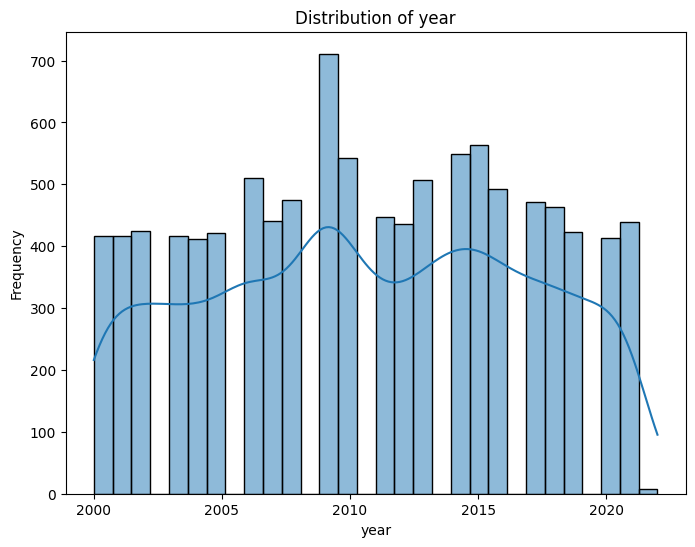

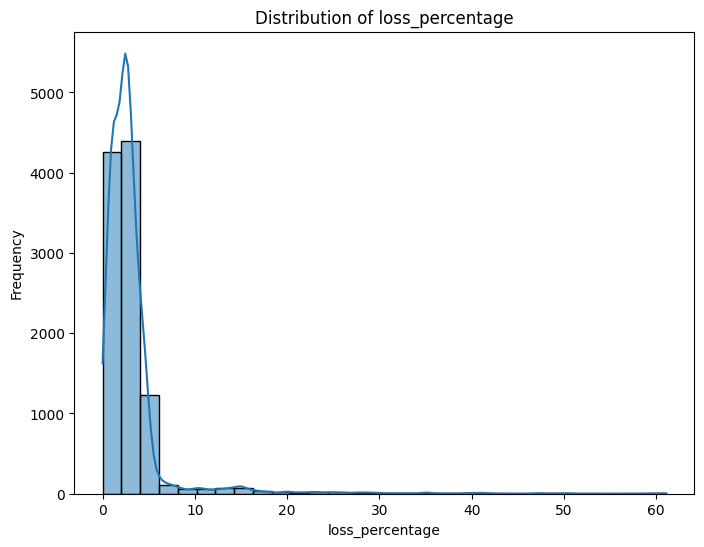

In [ ]:
###DATA VISUALISATION USING STATISTICAL TOOLS
plt.figure(figsize=(12, 8))  # Adjust figure size for better visualization

for col in d_frame.select_dtypes(include=np.number): #only numerical features
    plt.figure(figsize=(8, 6)) # individual figure size for each histogram
    sns.histplot(d_frame[col], kde=True, bins=30) #use seaborn for better styling, add kde and adjust bins
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


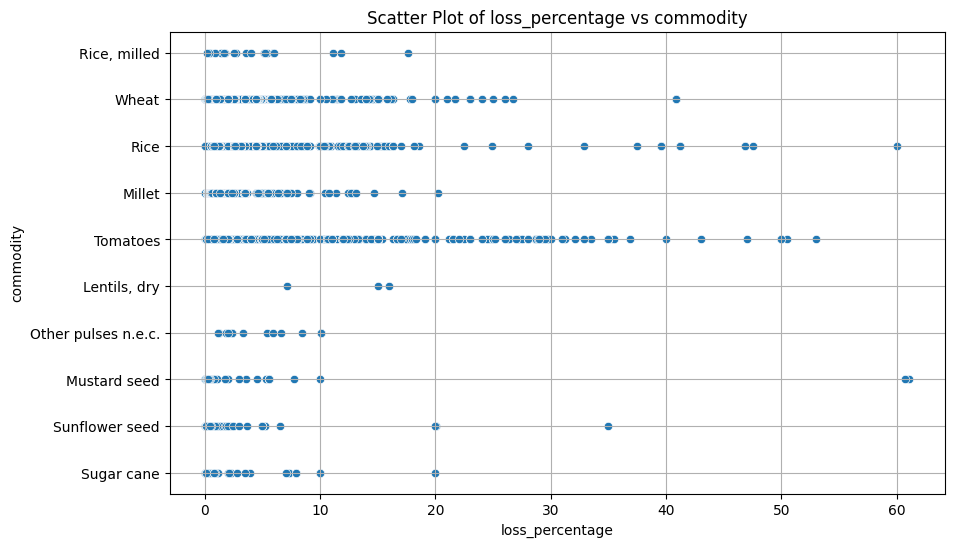

In [ ]:

##scatter plot for the data
plt.figure(figsize=(10, 6))  # Adjust figure size as needed


sns.scatterplot(x='loss_percentage', y='commodity', data=d_frame, palette='viridis')


plt.title('Scatter Plot of loss_percentage vs commodity') # title of the scatter plot
plt.xlabel('loss_percentage') #x-axis label
plt.ylabel('commodity') # y-axis label
plt.grid(True)  # Add a grid

plt.show()

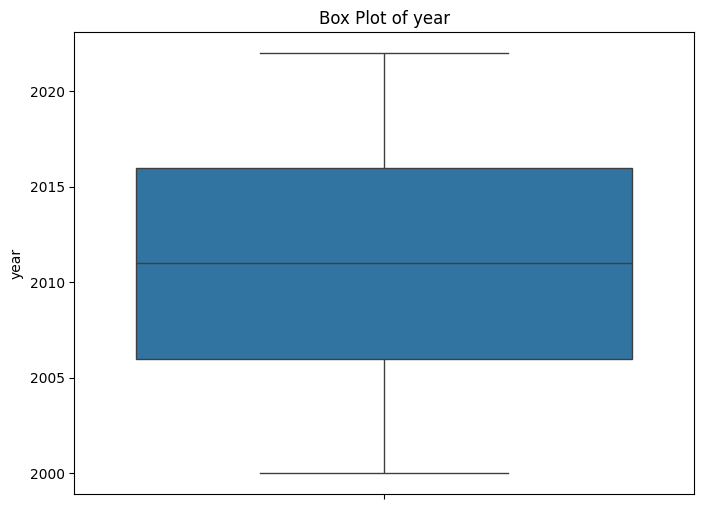

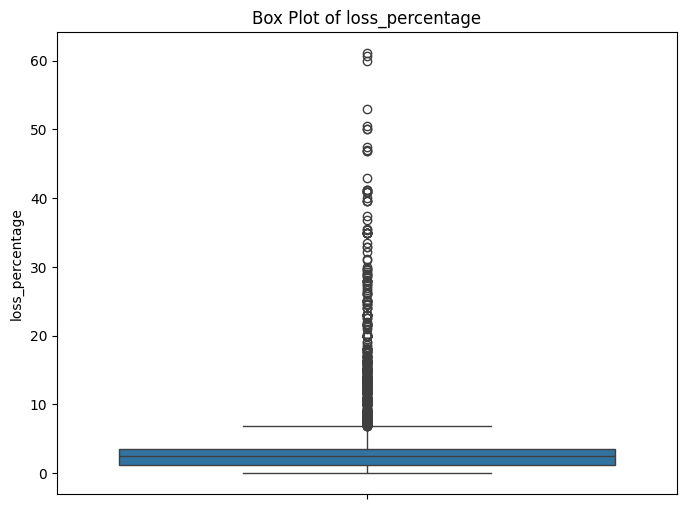

In [ ]:


##Box plot of year against the loss_percentage
numerical_features = d_frame.select_dtypes(include=np.number).columns

# Iterate through numerical features and create box plots
for feature in numerical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(y=feature, data=d_frame)  # Create box plot for the feature
    plt.title(f'Box Plot of {feature}')  # Set title
    plt.ylabel(feature)  # Set y-axis label
    plt.show()  # Display the plot

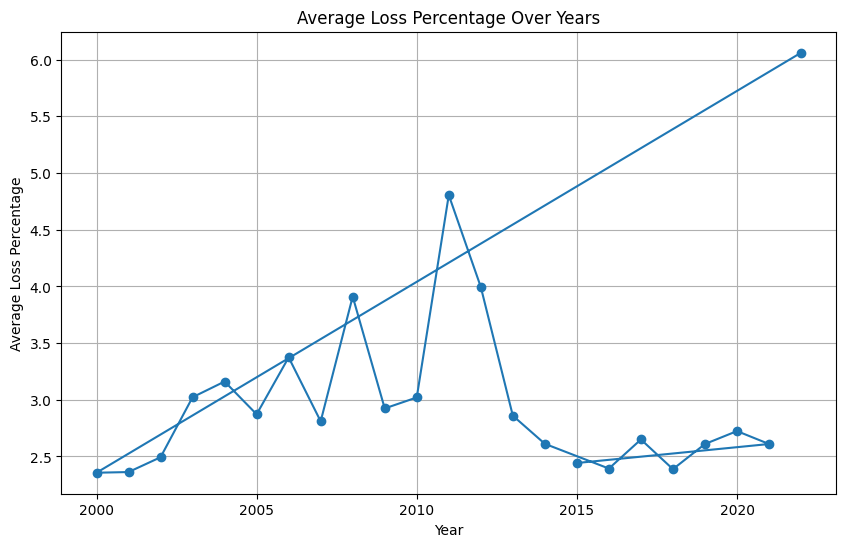

In [ ]:
# line graph
import matplotlib.pyplot as plt

def plot_line_graph(x_data, y_data, x_label, y_label, title):
    """
    Generates a line graph using matplotlib.

    Args:
        x_data: A list or numpy array representing the x-axis data.
        y_data: A list or numpy array representing the y-axis data.
        x_label: The label for the x-axis.
        y_label: The label for the y-axis.
        title: The title of the graph.
    """
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(x_data, y_data, marker='o', linestyle='-')  # Create the line plot with markers and lines

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)  # Add a grid for better readability

    plt.show()


# Example usage (replace with your actual data):
x_values = d_frame['year'].unique()  # Assuming 'year' is a column in your DataFrame
y_values = d_frame.groupby('year')['loss_percentage'].mean() # Calculate the average loss percentage for each year


plot_line_graph(x_values, y_values, 'Year', 'Average Loss Percentage', 'Average Loss Percentage Over Years')


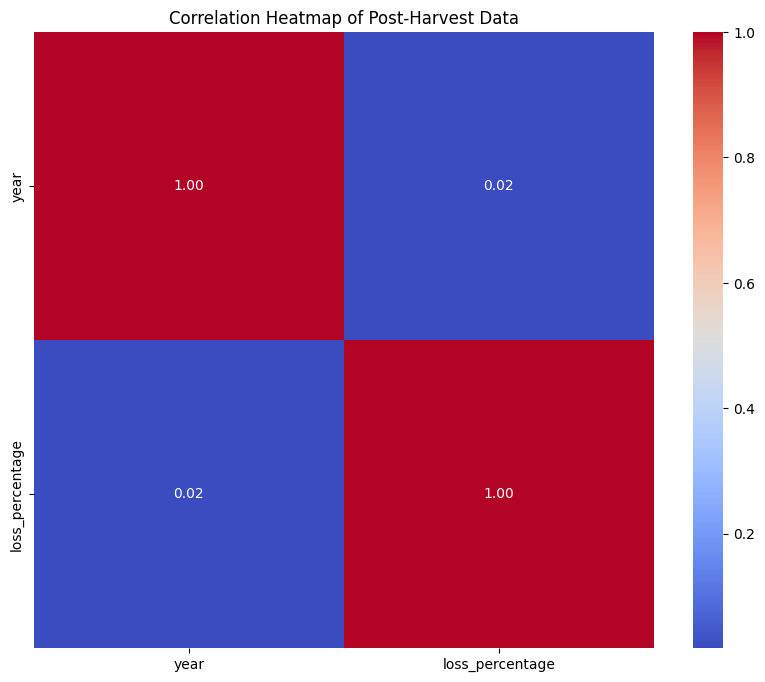

In [ ]:
#the correlation heatmap

def plot_heatmap(dataframe, title="Heatmap"):
    """
    Generates a heatmap of the correlation matrix for a given DataFrame.

    Args:
        dataframe: The pandas DataFrame for which to generate the heatmap.
        title: The title of the heatmap plot.
    """
    plt.figure(figsize=(10, 8))
    # Select only numerical columns for correlation calculation
    numerical_df = dataframe.select_dtypes(include=np.number)
    correlation_matrix = numerical_df.corr()  # Calculate the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # Create the heatmap using seaborn
    plt.title(title) # Set plot title
    plt.show() # Display the plot
# Assuming 'd_frame' is your DataFrame from the previous code
if 'd_frame' in locals() and isinstance(d_frame, pd.DataFrame):
    plot_heatmap(d_frame, "Correlation Heatmap of Post-Harvest Data")
else:
    print("The 'd_frame' DataFrame is not available or is not a pandas DataFrame.")

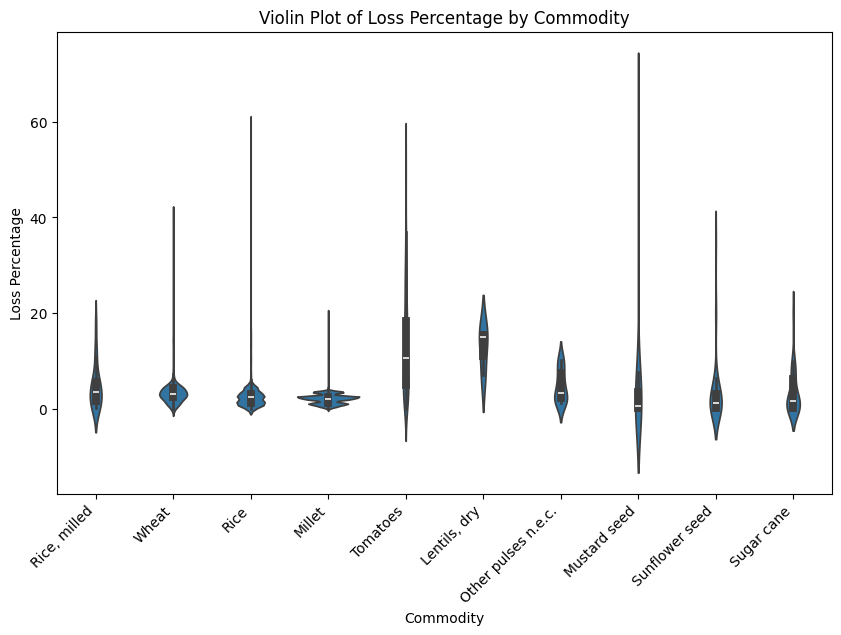

In [ ]:


# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='commodity', y='loss_percentage', data=d_frame)
plt.title('Violin Plot of Loss Percentage by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Loss Percentage')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()


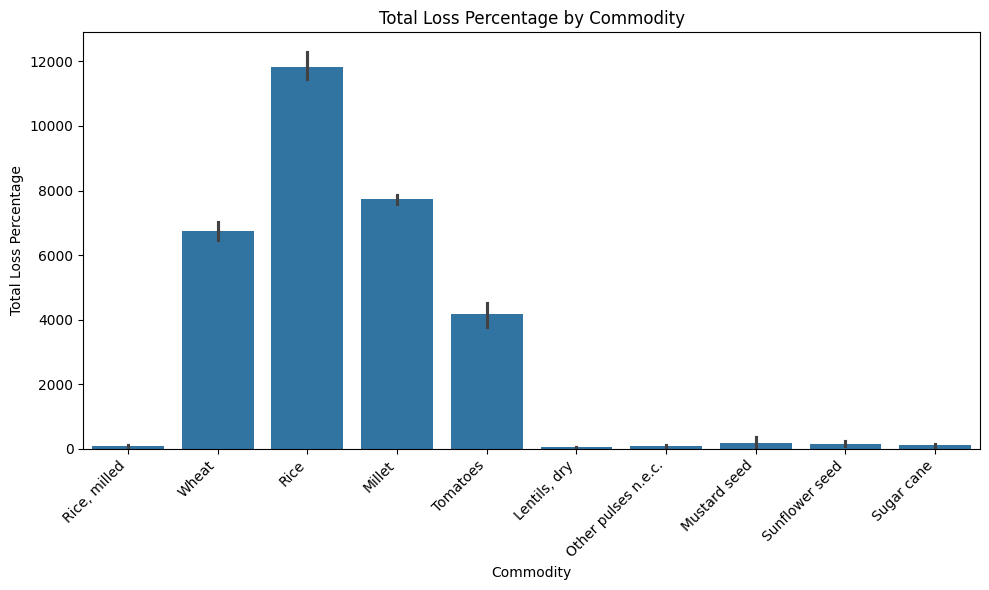

In [ ]:
# the bar graph plot


plt.figure(figsize=(10, 6))
sns.barplot(x='commodity', y='loss_percentage', data=d_frame, estimator=sum) # Use sum as estimator for total loss
plt.title('Total Loss Percentage by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Total Loss Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


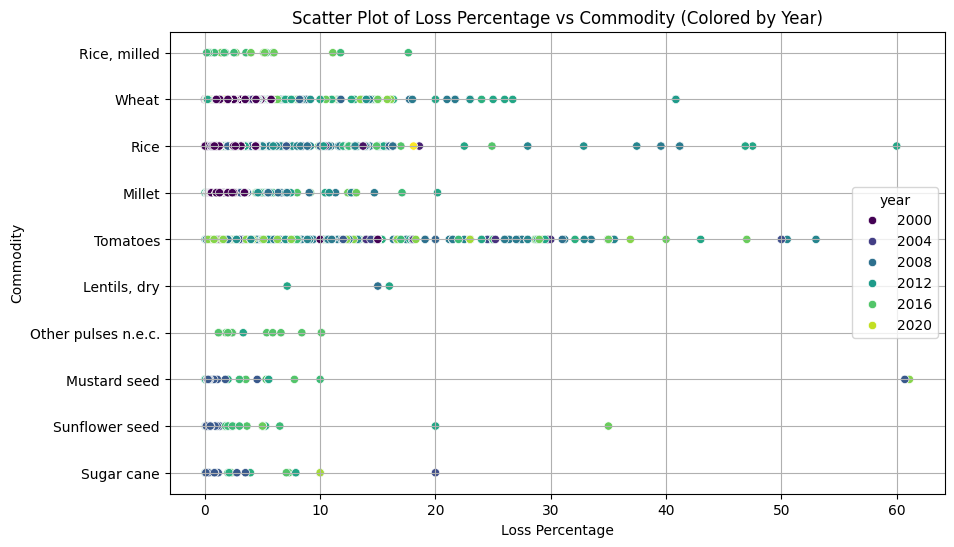

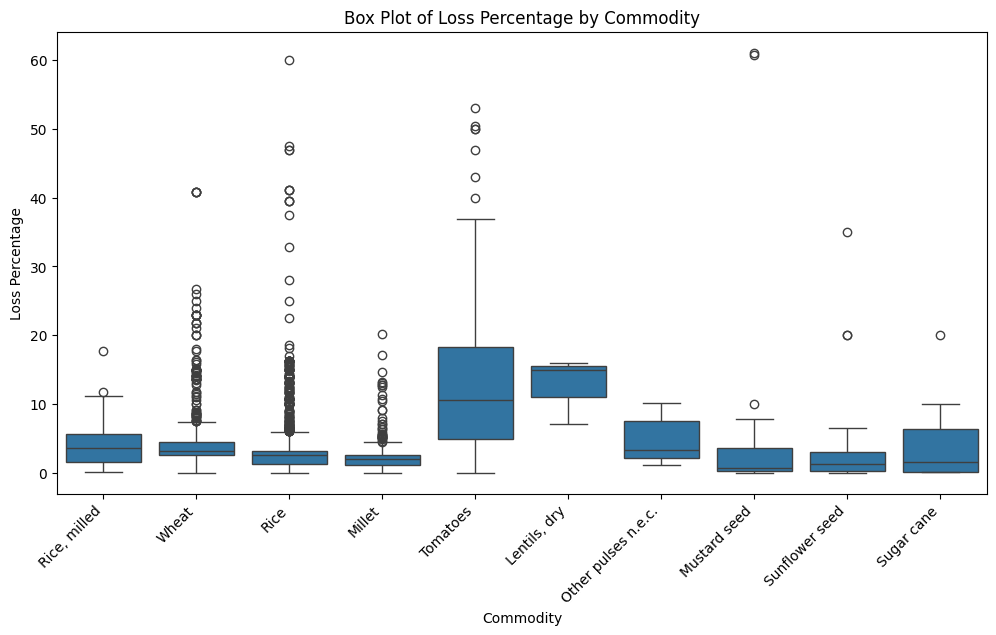

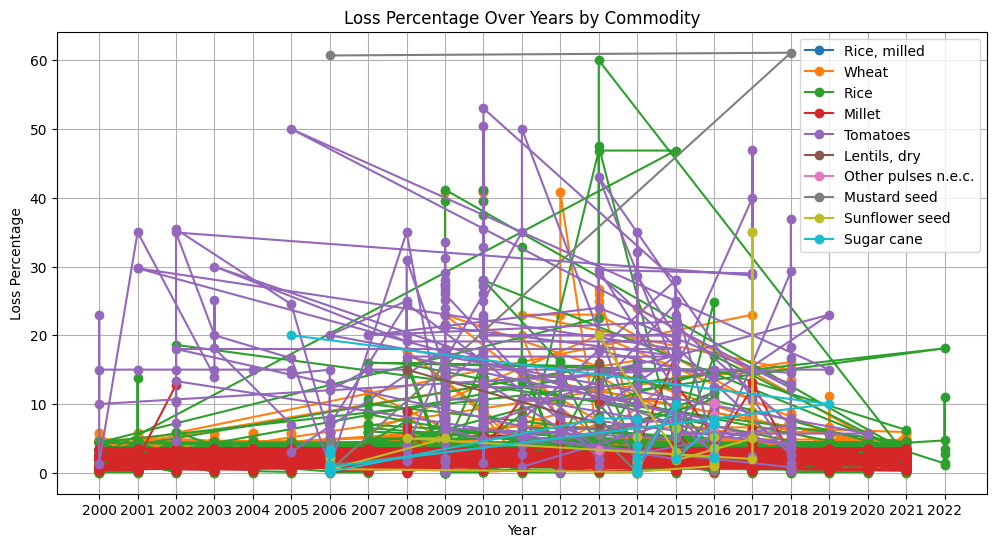

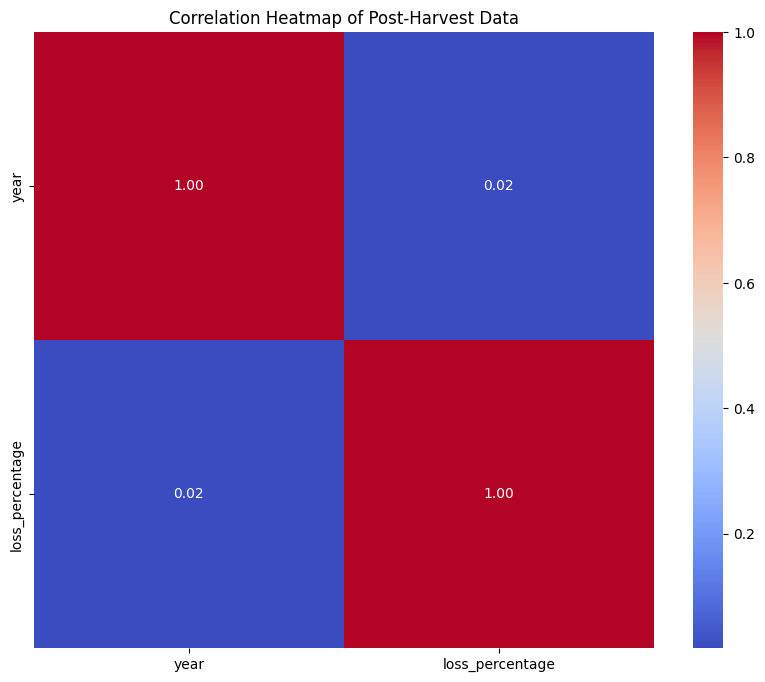

In [ ]:


# Bivariate Analysis and Plotting

# 'd_frame' is your DataFrame from the previous code
# and it contains the necessary columns for the analysis.

# 1. Scatter Plot: 'loss_percentage' vs. 'commodity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loss_percentage', y='commodity', data=d_frame, hue='year', palette='viridis') # Added hue for year
plt.title('Scatter Plot of Loss Percentage vs Commodity (Colored by Year)')
plt.xlabel('Loss Percentage')
plt.ylabel('Commodity')
plt.grid(True)
plt.show()

# Explanation:
# This scatter plot visualizes the relationship between loss percentage and commodity.
# The color coding by 'year' helps to see trends over time.
# Each point represents a data point, and the position reveals the corresponding loss percentage and commodity.
# Look for patterns or clusters: Do certain commodities experience higher losses? Does the loss percentage change over the years for specific commodities?


# 2. Box Plots: 'loss_percentage' grouped by 'commodity'
plt.figure(figsize=(12, 6))
sns.boxplot(x='commodity', y='loss_percentage', data=d_frame)
plt.title('Box Plot of Loss Percentage by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Loss Percentage')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.show()

# Explanation:
# Box plots show the distribution of loss percentage for each commodity.
# The box represents the interquartile range (IQR), the line inside is the median, and whiskers extend to 1.5 times the IQR.
# Outliers are shown as individual points.
# Compare the median, IQR, and outliers for different commodities to see variations in loss percentage distribution.


# 3. Line Plot: Average 'loss_percentage' over 'year' (grouped by 'commodity')
plt.figure(figsize=(12, 6))
for commodity in d_frame['commodity'].unique():
  commodity_data = d_frame[d_frame['commodity'] == commodity]
  plt.plot(commodity_data['year'], commodity_data['loss_percentage'], label=commodity, marker='o')
plt.title('Loss Percentage Over Years by Commodity')
plt.xlabel('Year')
plt.ylabel('Loss Percentage')
plt.xticks(d_frame['year'].unique()) # Ensure all years are displayed on the x-axis
plt.legend()
plt.grid(True)
plt.show()

# Explanation:
# This line plot tracks the average loss percentage over the years for each commodity.
# It helps identify trends, seasonality, or significant changes in loss over time.
# Observe how loss percentages change for each commodity year over year.


# 4. Correlation Heatmap
plot_heatmap(d_frame, "Correlation Heatmap of Post-Harvest Data")

# Explanation:
# This correlation heatmap shows the linear relationships between numerical features.
# Values close to +1 or -1 indicate strong positive or negative correlations, respectively.
# Values close to 0 mean no or weak correlation.
# Analyze which features are strongly correlated with the 'loss_percentage', which can help understand contributing factors.


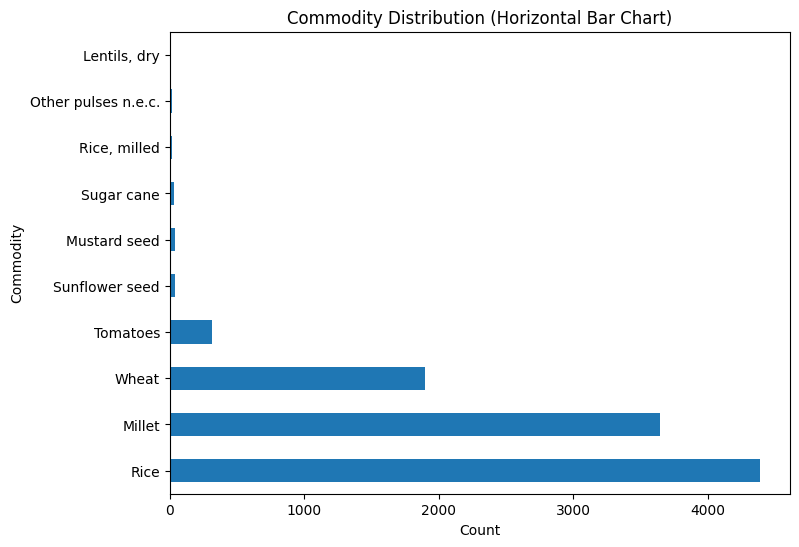

In [ ]:


# Assuming 'd_frame' and 'commodity_counts' are defined from the previous code.
# Define commodity_counts, labels, and sizes here since they were commented out
commodity_counts = d_frame['commodity'].value_counts()
labels = commodity_counts.index.tolist()
sizes = commodity_counts.values.tolist()

# Example 1: Horizontal Bar Chart
plt.figure(figsize=(8, 6))
commodity_counts.plot(kind='barh')  # Use 'barh' for horizontal bars
plt.title('Commodity Distribution (Horizontal Bar Chart)')
plt.xlabel('Count')
plt.ylabel('Commodity')
plt.show()



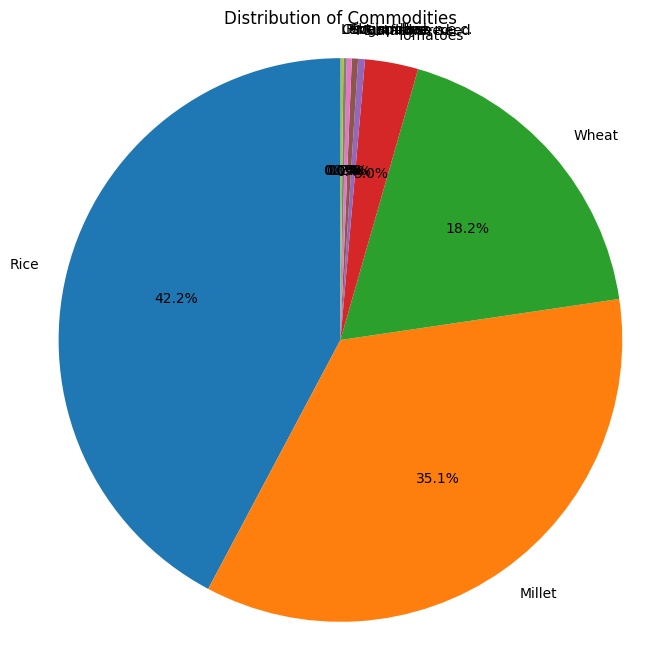

In [ ]:
##pie chart for our data

commodity_counts = d_frame['commodity'].value_counts()

# Extract labels and sizes for the pie chart
labels = commodity_counts.index.tolist()
sizes = commodity_counts.values.tolist()

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Commodities')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()

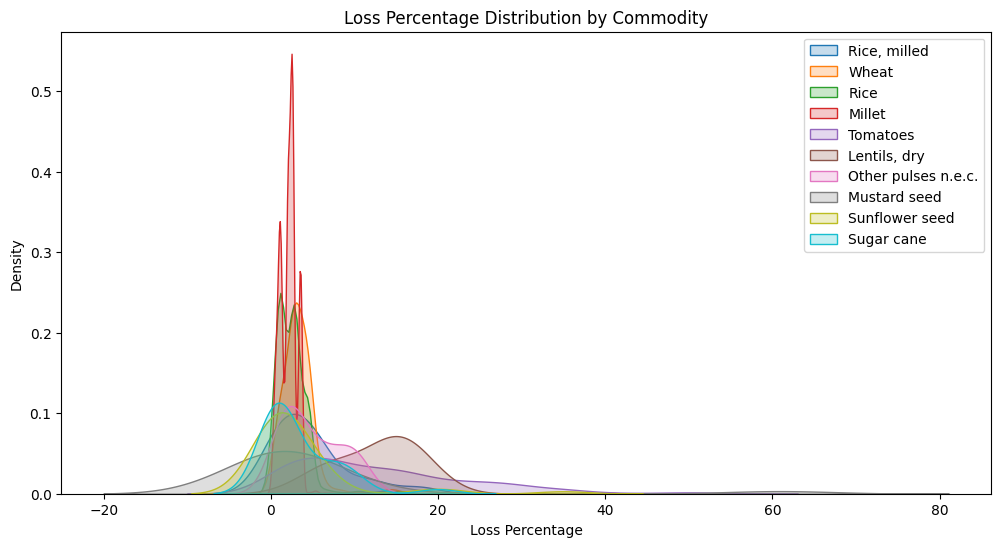

In [ ]:
# 1.  Loss Percentage Distribution by Year and Commodity:
#     - Insight: Shows how losses vary across different commodities over time.  Helps detect trends and potential seasonal effects.
plt.figure(figsize=(12, 6))
for commodity in d_frame['commodity'].unique():
    sns.kdeplot(d_frame[d_frame['commodity'] == commodity]['loss_percentage'], label=commodity, shade=True)
plt.title('Loss Percentage Distribution by Commodity')
plt.xlabel('Loss Percentage')
plt.ylabel('Density')
plt.legend()
plt.show()


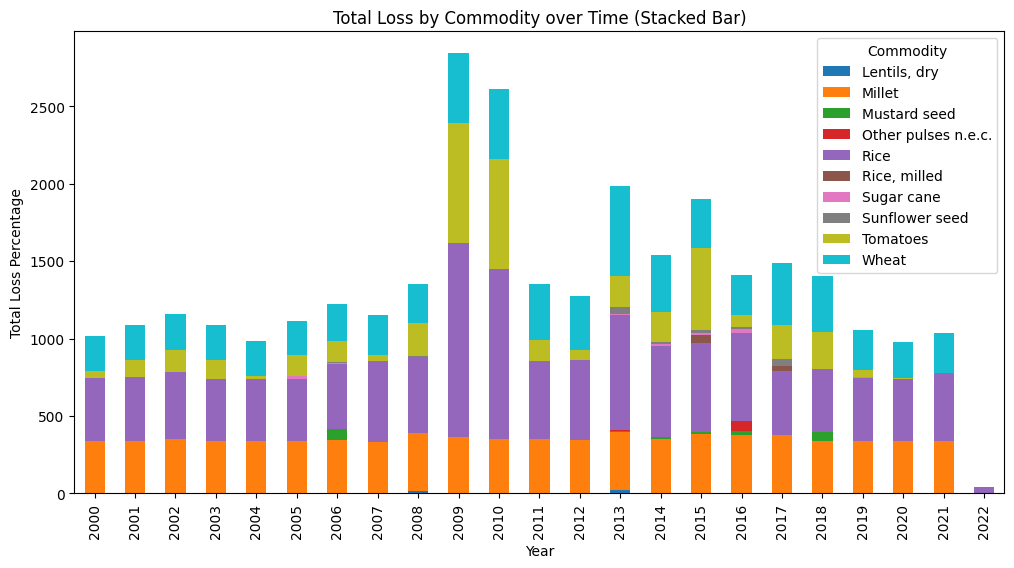

In [ ]:
# 6.  Stacked Bar Chart: Total Loss Percentage by Commodity over Time
#     - Insight: Visualize changes in loss percentage across commodities over different years in a stacked format
commodity_loss_by_year = d_frame.groupby(['year', 'commodity'])['loss_percentage'].sum().unstack()
commodity_loss_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Total Loss by Commodity over Time (Stacked Bar)')
plt.xlabel('Year')
plt.ylabel('Total Loss Percentage')
plt.legend(title='Commodity')
plt.show()


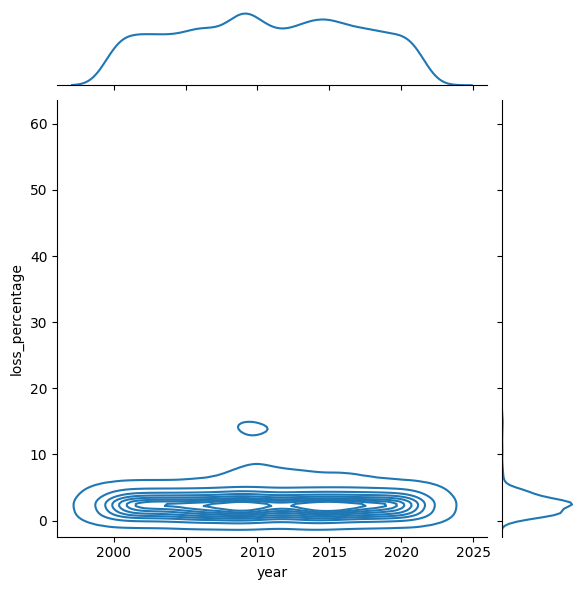

In [ ]:
# 5.  Joint Plot: Loss Percentage vs. another relevant numerical feature.
#    - Insight: Shows the relationship between two variables, with marginal distributions.
sns.jointplot(x='year', y='loss_percentage', data=d_frame, kind='kde')
plt.show()

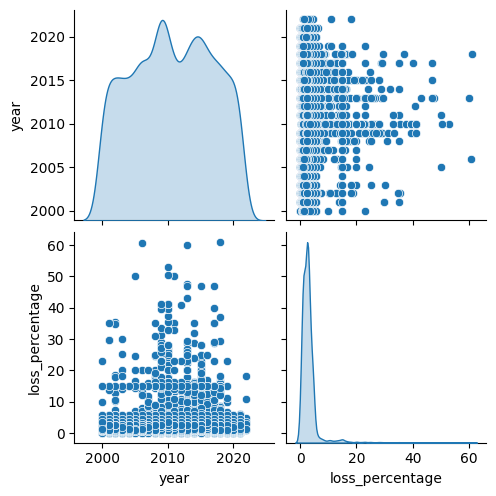

In [ ]:
# 4. Pair Plot: Relationship between numerical variables.
#    - Insight: Provides a visual overview of all pairwise relationships between numerical variables, revealing potential correlations.
sns.pairplot(d_frame.select_dtypes(include=np.number), diag_kind='kde')
plt.show()

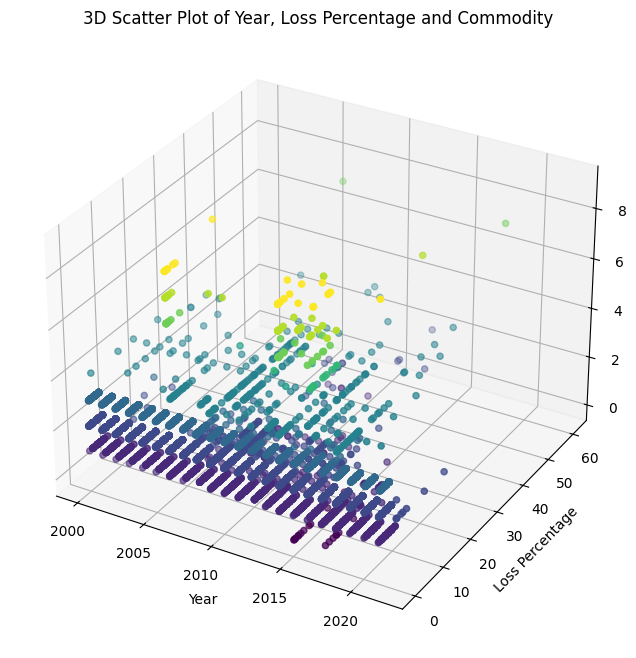

In [ ]:
#  3D Scatter Plot (Year, Loss Percentage, Commodity)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assuming commodity is categorical, map it to numerical values for the 3D plot
commodity_mapping = {commodity: i for i, commodity in enumerate(d_frame['commodity'].unique())}
d_frame['commodity_numerical'] = d_frame['commodity'].map(commodity_mapping)


ax.scatter(d_frame['year'], d_frame['loss_percentage'], d_frame['commodity_numerical'], c=d_frame['commodity_numerical'], cmap='viridis')


ax.set_xlabel('Year')
ax.set_ylabel('Loss Percentage')
ax.set_zlabel('Commodity')
plt.title('3D Scatter Plot of Year, Loss Percentage and Commodity')
plt.show()
